In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # data visualization

from keras.models import Sequential # ANN architecture
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers.legacy import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

test.csv
train.csv



In [25]:
# Load the training data
train = pd.read_csv("input/train.csv")
print(train.shape)
train.head() # Display the first five rows of the training data

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Load the test data
test= pd.read_csv("input/test.csv")
print(test.shape)
test.head() # Display the first five rows of the test data

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [28]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
print(X_train.shape) # (42000,28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_test.shape) # (28000,28,28,1)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [29]:
# Standardization

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

# basic normalization of the data, can be improved or changed to use preprocessing.scale
def standardize(x): 
    return (x-mean_px)/std_px

In [30]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [31]:
# fix random seed for reproducibility
# seed may be changed to improve accuracy
seed = 43
np.random.seed(seed)

In [32]:
# image generator to create more images for training
# can greatly improve this method

from keras.preprocessing import image
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

In [33]:
# Cross Validation

from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [50]:
# CNN model, can add batch normalization, dropout, etc.

from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [51]:
# Evaluation step

model= get_cnn_model() # can change get model to be any of the other test networks
print(model.optimizer.lr)
model.optimizer.lr=0.01

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [52]:
history= model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

/var/folders/m2/1tq_wk4s4tg5pl9yz0wxft4c0000gn/T/ipykernel_15696/3858127178.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,
2023-05-28 17:38:48.957472: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


  590/37800 [..............................] - ETA: 26:06 - loss: 0.2317 - accuracy: 0.9339WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 37800 batches). You may need to use the repeat() function when building your dataset.


2023-05-28 17:39:14.528955: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


37800/37800 [==============================] - 26s 684us/step - loss: 0.2315 - accuracy: 0.9340 - val_loss: 0.1208 - val_accuracy: 0.9693


In [53]:
# information on the training process

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

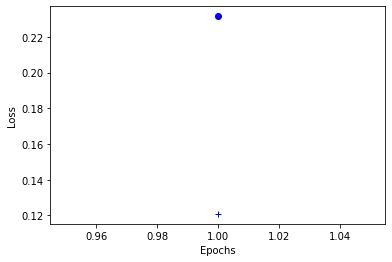

In [54]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

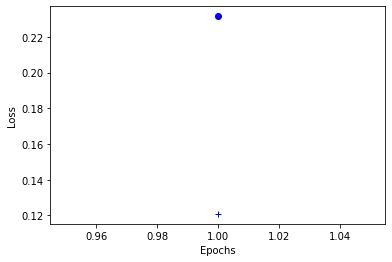

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [56]:
predictions=model.predict(X_test, verbose=0) 
classes=np.argmax(predictions,axis=1)

submissions = pd.DataFrame({"ImageId": list(range(1,len(classes)+1)),
                                "Label": classes})
submissions.to_csv("output/DR.csv", index=False, header=True)